In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_file_path = "/content/drive/MyDrive/Dataset Archive.zip"
extract_dir = "/content/drive/MyDrive/Dataset_Unzipped"

if os.path.exists(zip_file_path):
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: '{zip_file_path}' does not exist.")


Successfully extracted '/content/drive/MyDrive/Copy of archive.zip' to '/content'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob as gb
import os
import cv2
import tensorflow as tf
import pathlib

In [ ]:
train = '/content/drive/MyDrive/Dataset_Unzipped/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
size = 224

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    rescale=1/255.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    train, batch_size=164, target_size=(size, size), subset="training", color_mode="rgb",
    class_mode="categorical", shuffle=True
)

Found 63282 images belonging to 38 classes.


In [ ]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

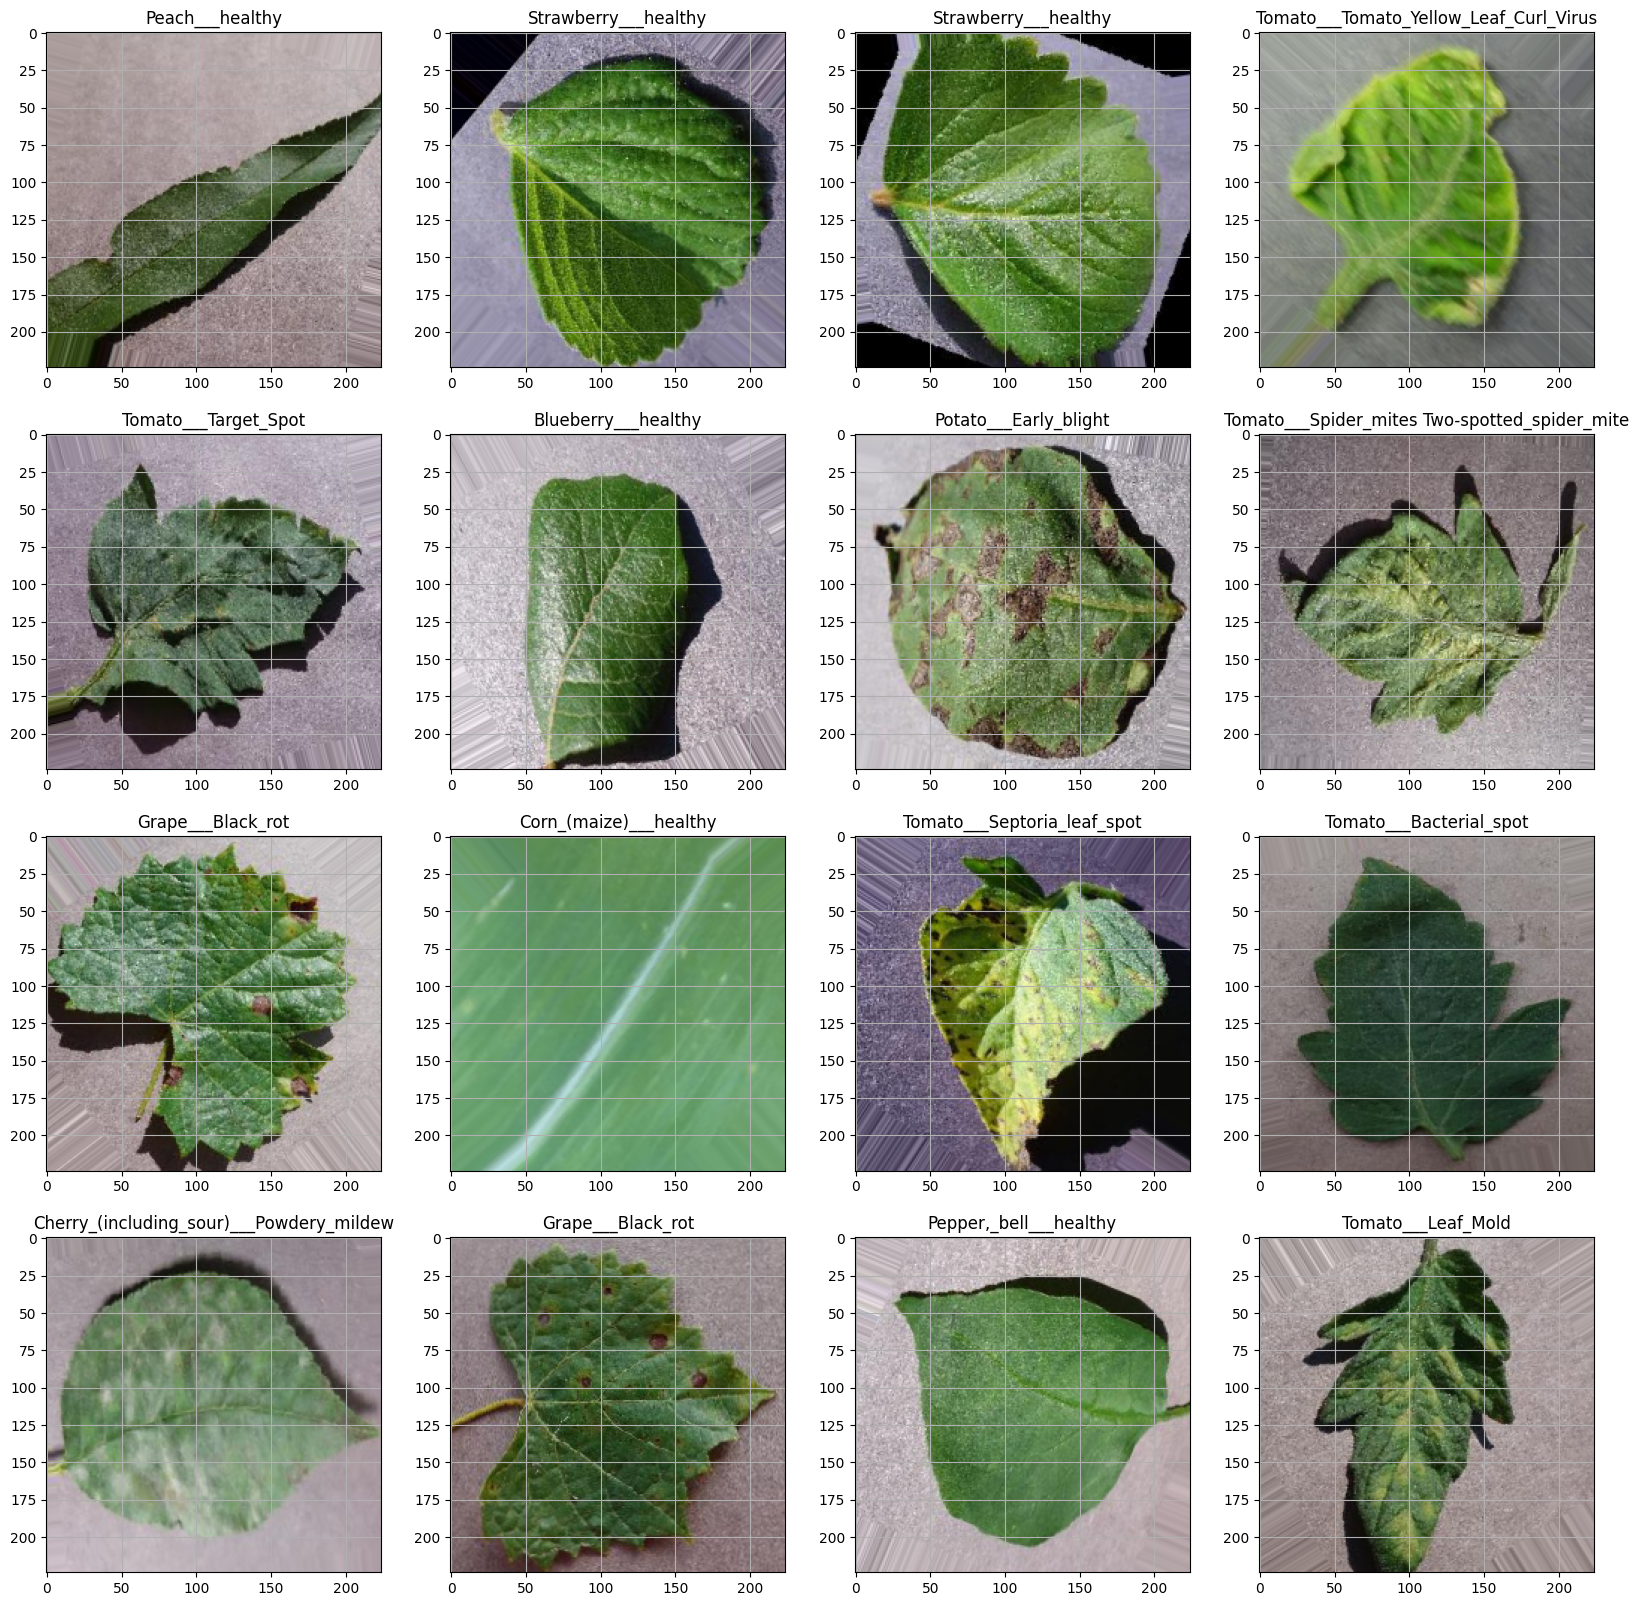

In [ ]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
        plt.grid(None)
    plt.show()
    break


In [ ]:
valid='/content/drive/MyDrive/Dataset_Unzipped/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
valid_generator=ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(valid,
                      batch_size=164,
                      target_size=(224,224),
                      subset='validation',
                      color_mode='rgb',
                      class_mode='categorical',
                      shuffle=False)

In [ ]:
test='/content/drive/MyDrive/Dataset_Unzipped/test'
test_generator=ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224,224),
                      color_mode='rgb',
                      class_mode='categorical',
                      shuffle=False)

Found 17572 images belonging to 38 classes.


In [ ]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
from tensorflow import keras
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=7, strides=1,
                padding="same", activation="relu", name="Conv1", input_shape= (224,224,3)))

model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1,
                              padding="same", activation="relu", name="Conv2"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1,
                              padding="same", activation="relu", name="Conv3"))

model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1,
                              padding="same", activation="relu", name="Conv4"))

model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

model.add(keras.layers.Flatten(name="Flatten1"))

model.add(keras.layers.Dense(128, activation="relu", name="Dense1"))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(64, activation="relu", name="Dense2"))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(38, activation="softmax", name="Output"))

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

model_ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)

callbacks=[early_stopping,model_checkpoint,model_ReduceLROnPlateau]

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer= 'Adam', metrics=["accuracy","precision","recall"])

In [ ]:
history = model.fit(train_generator,
                    epochs = 5,
                    validation_data = valid_generator,
                    callbacks = callbacks
                    )

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


386/386 ━━━━━━━━━━━━━━━━━━━━ 950s 2s/step - accuracy: 0.2102 - loss: 3.0523 - precision: 0.6081 - recall: 0.0873 - val_accuracy: 0.5947 - val_loss: 1.3924 - val_precision: 0.7377 - val_recall: 0.4730 - learning_rate: 0.0010
Epoch 2/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 861s 2s/step - accuracy: 0.7024 - loss: 0.9579 - precision: 0.8194 - recall: 0.5971 - val_accuracy: 0.7623 - val_loss: 0.7559 - val_precision: 0.8211 - val_recall: 0.7164 - learning_rate: 0.0010
Epoch 3/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 861s 2s/step - accuracy: 0.8331 - loss: 0.5240 - precision: 0.8829 - recall: 0.7901 - val_accuracy: 0.8209 - val_loss: 0.5427 - val_precision: 0.8607 - val_recall: 0.7945 - learning_rate: 0.0010
Epoch 4/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 824s 2s/step - accuracy: 0.8760 - loss: 0.3856 - precision: 0.9070 - recall: 0.8485 - val_accuracy: 0.8789 - val_loss: 0.3701 - val_precision: 0.9030 - val_recall: 0.8599 - learning_rate: 0.0010
Epoch 5/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 864s 2s/step - accuracy: 0.9055 - l

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer= 'Adam', metrics=["accuracy","precision","recall"])

In [ ]:
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

precision = history.history['precision']
val_precision = history.history['val_precision']

recall =history.history['recall']
val_recall =history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

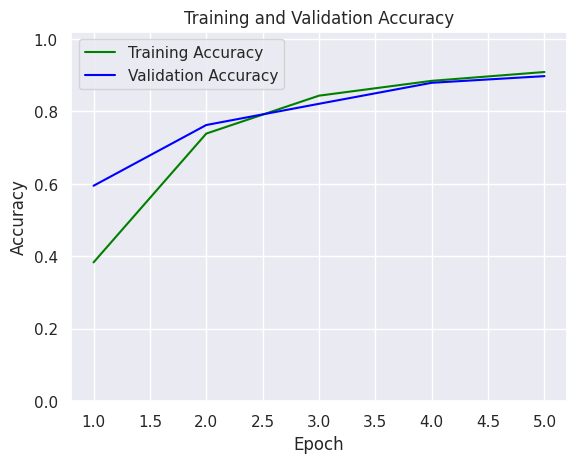

In [ ]:
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0,1.02)
plt.show()

In [ ]:
model_evaluate = model.evaluate(test_generator)
print("Loss     : ",model_evaluate[0])
print("Accuracy : ",model_evaluate[1])
print("Precision  : ",model_evaluate[2])
print("Recall : ",model_evaluate[3])

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 44s 392ms/step - accuracy: 0.8956 - loss: 0.3197 - precision: 0.9152 - recall: 0.8824
Loss     :  0.3150208294391632
Accuracy :  0.8953448534011841
Precision  :  0.9147263765335083
Recall :  0.8808900713920593


In [ ]:
model.save('CNN_plantdiseases_model.keras')